Write your post here.

In [5]:
from gplearn.genetic import SymbolicRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.random import check_random_state
import numpy as np
import pandas as pd
from matplotlib import pyplot as pl
from matplotlib import rcParams
from IPython.display import Image
from scipy.io import loadmat
import pydotplus
% matplotlib inline

In [4]:
rcParams['axes.formatter.limits'] = (-2, 3)
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['font.size'] = 16

In [6]:
fpath ='/accounts/ekarakoy/DATA/OWT/nomad_rrs4clustering.mat'

In [10]:
matlabData = loadmat(fpath)
matlabData.keys()

dict_keys(['lon_nomad', '__header__', 'wl', 'rrs_below', '__globals__', '__version__', 'lat_nomad', 'chl_nomad'])

In [13]:
wavelength = matlabData['wl'][0]
rrsBelow = matlabData['rrs_below']
chl = matlabData['chl_nomad'] # I might use this as an additional feature in clustering

In [20]:
labels = list(wavelength) + ['chl']
df = pd.DataFrame(data=np.hstack((rrsBelow, chl)), columns=labels)

In [21]:
df.head()

,411,443,469,489,510,520,547,550,555,560,565,670,chl
0,0.002307,0.003225,0.004674,0.006265,0.007661,0.008944,0.012935,0.013410,0.014040,0.014715,0.015325,0.006588,38.19
1,0.002035,0.002650,0.003273,0.004149,0.004767,0.005416,0.007338,0.007570,0.007878,0.008208,0.008549,0.003241,35.01
2,0.001862,0.002271,0.002654,0.003523,0.004367,0.005147,0.007423,0.007691,0.008053,0.008434,0.008822,0.003084,26.91
3,0.002817,0.003330,0.004096,0.005482,0.006963,0.008243,0.012075,0.012525,0.013127,0.013770,0.014361,0.006154,47.96
4,0.001735,0.001959,0.002129,0.002882,0.003638,0.004115,0.005079,0.005191,0.005337,0.005507,0.005716,0.003423,23.55


Make a new dataframe with just SeaWiFS-wavelength Rrs and chl.

In [37]:
swfWvl = [411, 443, 489, 510, 555, 670]

In [40]:
dfSwf = df.loc[:, swfWvl + ['chl']]

In [41]:
dfSwf.head()

,411,443,489,510,555,670,chl
0,0.002307,0.003225,0.006265,0.007661,0.014040,0.006588,38.19
1,0.002035,0.002650,0.004149,0.004767,0.007878,0.003241,35.01
2,0.001862,0.002271,0.003523,0.004367,0.008053,0.003084,26.91
3,0.002817,0.003330,0.005482,0.006963,0.013127,0.006154,47.96
4,0.001735,0.001959,0.002882,0.003638,0.005337,0.003423,23.55


In [29]:
dfSwf.describe()

,411,443,489,510,555,670,chl
count,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000
mean,0.009913,0.009351,0.009086,0.007638,0.006105,0.001289,1.544312
std,0.006548,0.005329,0.004598,0.004656,0.006091,0.002629,4.002408
min,0.000098,0.000365,0.000546,0.000502,0.000398,0.000023,0.000000
25%,0.005000,0.005335,0.006135,0.005511,0.003029,0.000196,0.054000
50%,0.007967,0.008120,0.008528,0.006562,0.003970,0.000385,0.301200
75%,0.013895,0.012699,0.011118,0.007965,0.006047,0.001101,1.218750
max,0.039485,0.031489,0.046573,0.050136,0.060087,0.031832,72.120000


In [50]:
dfSwf['maxBlue'] = dfSwf.loc[:,[443, 490, 510]].max(axis=1)

In [51]:
dfSwf.head()

,411,443,489,510,555,670,chl,maxBlue
0,0.002307,0.003225,0.006265,0.007661,0.014040,0.006588,38.19,0.007661
1,0.002035,0.002650,0.004149,0.004767,0.007878,0.003241,35.01,0.004767
2,0.001862,0.002271,0.003523,0.004367,0.008053,0.003084,26.91,0.004367
3,0.002817,0.003330,0.005482,0.006963,0.013127,0.006154,47.96,0.006963
4,0.001735,0.001959,0.002882,0.003638,0.005337,0.003423,23.55,0.003638


In [30]:
dfSwf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 7 columns):
411    2404 non-null float64
443    2404 non-null float64
489    2404 non-null float64
510    2404 non-null float64
555    2404 non-null float64
670    2404 non-null float64
chl    2404 non-null float64
dtypes: float64(7)
memory usage: 131.5 KB


no cleanup seemingly necessary but standardization needed

In [76]:
X = dfSwf.loc[:,swfWvl + ['maxBlue']]
y = dfSwf.loc[:,'chl']

In [55]:
X.shape, y.shape

((2404, 7), (2404,))

In [61]:
X_train.head()

,411,443,489,510,555,670,maxBlue
1310,0.007818,0.007931,0.008358,0.007578,0.005549,0.000556,0.007931
1814,0.004469,0.004518,0.004765,0.004566,0.003793,0.000753,0.004566
928,0.007968,0.010205,0.014261,0.016086,0.019881,0.007593,0.016086
1608,0.005798,0.005981,0.008126,0.008665,0.008786,0.001569,0.008665
1497,0.004918,0.004571,0.004863,0.005005,0.006060,0.001156,0.005005


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [79]:
maxBlue_train = X_train.maxBlue
maxBlue_test = X_test.maxBlue
X_train.drop('maxBlue',axis=1, inplace=True)
X_test.drop('maxBlue',axis=1, inplace=True)

In [88]:
def CI(df):
    # assumes df has rrs data at specific wavelengths
    blue, green, red=443, 555, 670
    ci = df[green] - (df[blue] + (green - blue) / (red - blue) * (df[red] - df[blue]))
    return ci

In [91]:
def OC4(rrsMaxBlue, rrsGreen):
    # maxblue is last column of rrsData
    a=[0.3272, -2.9940, 2.7218, -1.2259, -0.5683]
    poly = a[0] + np.sum([a[i]*np.power(np.log10(rrsMaxBlue/rrsGreen),i )
                          for i in range(1,5) ], axis=0)
    chl = np.power(10,poly)
    return chl

In [92]:
green = 555
chl_train = OC4(maxBlue_train.values, X_train[green].values)

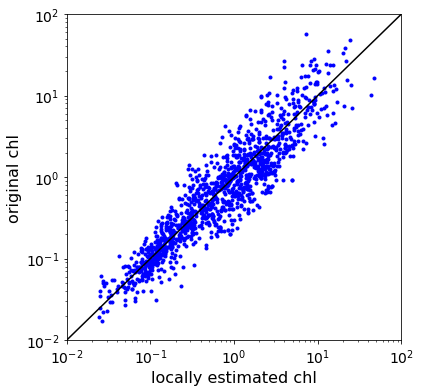

In [98]:
pl.figure(figsize=(6,6))
pl.plot(chl_train,y_train.values,'b.')
pl.yscale('log')
pl.ylim(1e-2,1e2)
pl.xlim(1e-2,1e2)
pl.xscale('log')
pl.plot([1e-2,1e2],[1e-2,1e2],'k')
pl.xlabel('locally estimated chl', fontsize=16)
pl.ylabel('original chl', fontsize=16)

In [86]:
y_train.shape

(1610,)

In [73]:
a = X_train['maxBlue'].values / X_train[green].values